In [1]:
import os
import sys
#from stocker import Stocker
import io
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import pandas_datareader as pdr
import matplotlib.dates as mdates
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import datetime
%config IPCompleter.greedy=True
from matplotlib import style
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pandas.plotting import register_matplotlib_converters


/Users/josh/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
pwd

'/Users/josh'

In [3]:
cd desktop

/Users/josh/Desktop


In [4]:
cd HealthcareData

/Users/josh/Desktop/HealthcareData


In [5]:
Abbv_df = pd.read_csv('Abbv2.csv')
Mrna_df = pd.read_csv('Mrna2.csv')
Vir_df = pd.read_csv('Vir2.csv')
Regn_df = pd.read_csv('Regn2.csv')
Gild_df = pd.read_csv('Gild2.csv')

In [6]:
style.use('classic')

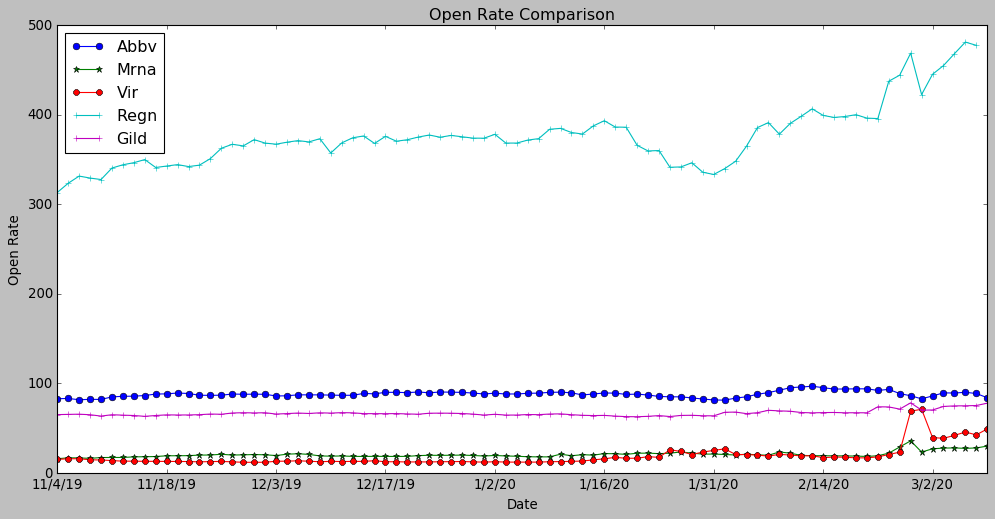

In [7]:
ax = plt.gca()
#plt.legend(loc='upper left', shadow=True, fontsize='x-large')

Abbv_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='o',label='Abbv',x_compat=True)
Mrna_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='*',label='Mrna',x_compat=True)
Vir_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='8',label='Vir',x_compat=True)
Regn_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='+',label='Regn',x_compat=True)
Gild_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='+',label='Gild',x_compat=True)


plt.title("Open Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Open Rate");

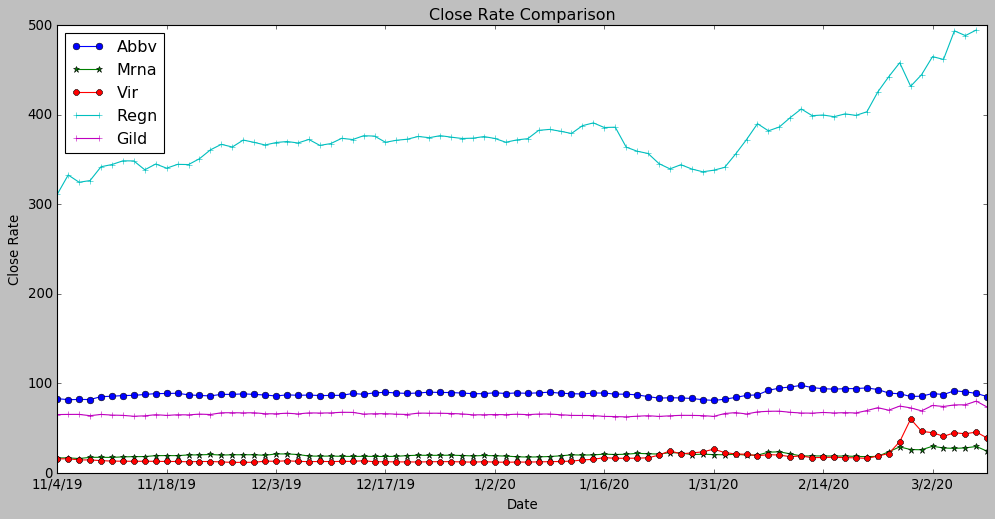

In [8]:
ax = plt.gca()

Abbv_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='o',label='Abbv',x_compat=True)
Mrna_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='*',label='Mrna',x_compat=True)
Vir_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='8',label='Vir',x_compat=True)
Regn_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='+',label='Regn',x_compat=True)
Gild_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='+',label='Gild',x_compat=True)


plt.title("Close Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Close Rate");

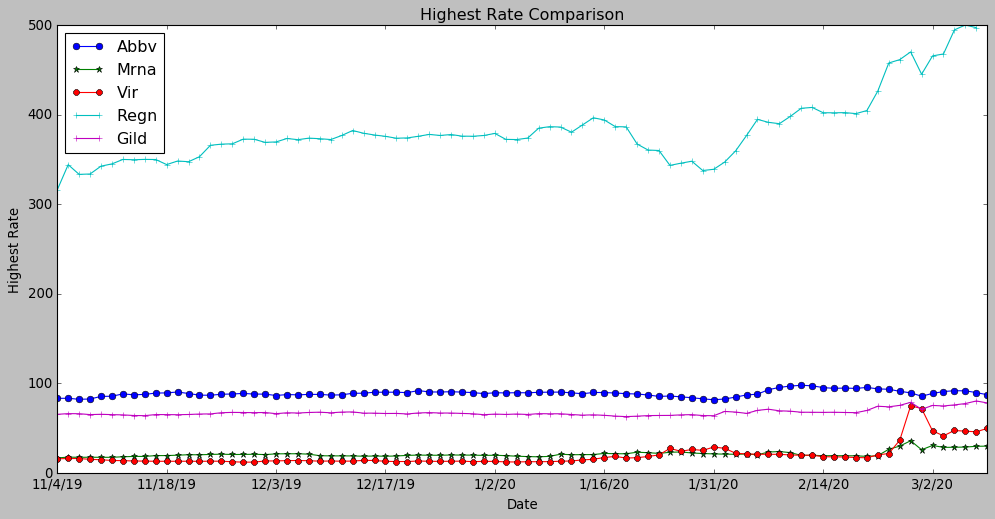

In [9]:
ax = plt.gca()

Abbv_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='o',label='Abbv',x_compat=True)
Mrna_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='*',label='Mrna',x_compat=True)
Vir_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='8',label='Vir',x_compat=True)
Regn_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='+',label='Regn',x_compat=True)
Gild_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='+',label='Gild',x_compat=True)

plt.title("Highest Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Highest Rate");

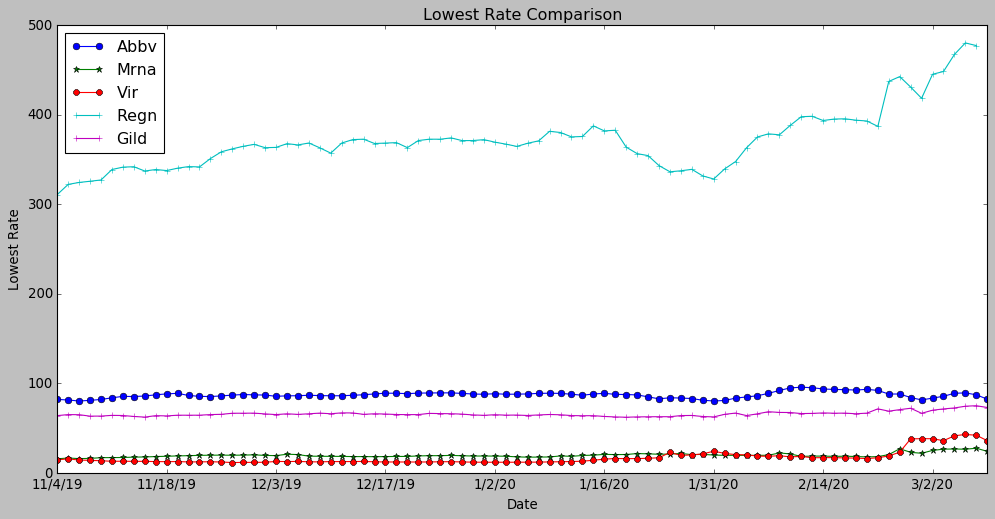

In [10]:
ax = plt.gca()

Abbv_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='o',label='Abbv',x_compat=True)
Mrna_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='*',label='Mrna',x_compat=True)
Vir_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='8',label='Vir',x_compat=True)
Regn_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='+',label='Regn',x_compat=True)
Gild_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='+',label='Gild',x_compat=True)

plt.title("Lowest Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Lowest Rate");

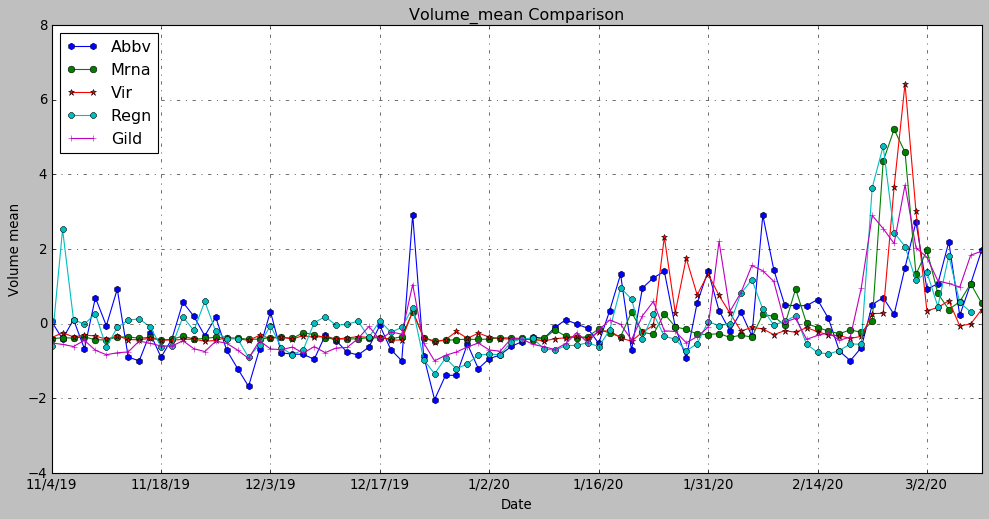

In [11]:
ax = plt.gca()

Abbv_df['Volume_mean']=(Abbv_df['Volume']-Abbv_df['Volume'].mean())/Abbv_df['Volume'].std()
Mrna_df['Volume_mean']=(Mrna_df['Volume']-Mrna_df['Volume'].mean())/Mrna_df['Volume'].std()
Vir_df['Volume_mean']=(Vir_df['Volume']-Vir_df['Volume'].mean())/Vir_df['Volume'].std()
Regn_df['Volume_mean']=(Regn_df['Volume']-Regn_df['Volume'].mean())/Regn_df['Volume'].std()
Gild_df['Volume_mean']=(Gild_df['Volume']-Gild_df['Volume'].mean())/Gild_df['Volume'].std()
Abbv_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='h',label='Abbv',x_compat=True)
Mrna_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='o',label='Mrna',x_compat=True)
Vir_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='*',label='Vir',x_compat=True)
Regn_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='8',label='Regn',x_compat=True)
Gild_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='+',label='Gild',x_compat=True)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
#datacursor(formatter=formatter, hover=True)
plt.title("Volume_mean Comparison")
plt.xlabel("Date")
plt.ylabel("Volume mean");

In [12]:
# Define the minumum of periods to consider 
min_periods = 2

# Calculate the volatility
Abbv_volatility=np.log(Abbv_df['Adj Close'].pct_change()+1)
Abbv_volatility.fillna(0,inplace=True)
Abbv_volatility=Abbv_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Abbv_df['Volatility']=Abbv_volatility

Mrna_volatility=np.log(Mrna_df['Adj Close'].pct_change()+1)
Mrna_volatility.fillna(0,inplace=True)
Mrna_volatility=Mrna_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Mrna_df['Volatility']=Mrna_volatility

Vir_volatility=np.log(Vir_df['Adj Close'].pct_change()+1)
Vir_volatility.fillna(0,inplace=True)
Vir_volatility=Vir_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Vir_df['Volatility']=Vir_volatility


Regn_volatility=np.log(Regn_df['Adj Close'].pct_change()+1)
Regn_volatility.fillna(0,inplace=True)
Regn_volatility=Regn_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Regn_df['Volatility']=Regn_volatility


Gild_volatility=np.log(Gild_df['Adj Close'].pct_change()+1)
Gild_volatility.fillna(0,inplace=True)
Gild_volatility=Gild_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Gild_df['Volatility']=Gild_volatility


Abbv_df['HL_PCT'] = (Abbv_df['High'] - Abbv_df['Low']) / Abbv_df['Close'] * 100.0
Abbv_df['PCT_change'] = (Abbv_df['Close'] - Abbv_df['Open']) / Abbv_df['Open'] * 100.0

Mrna_df['HL_PCT'] = (Mrna_df['High'] - Mrna_df['Low']) / Mrna_df['Close'] * 100.0
Mrna_df['PCT_change'] = (Mrna_df['Close'] - Mrna_df['Open']) / Mrna_df['Open'] * 100.0

Vir_df['HL_PCT'] = (Vir_df['High'] - Vir_df['Low']) / Vir_df['Close'] * 100.0
Vir_df['PCT_change'] = (Vir_df['Close'] - Vir_df['Open']) / Vir_df['Open'] * 100.0

Regn_df['HL_PCT'] = (Regn_df['High'] - Regn_df['Low']) / Regn_df['Close'] * 100.0
Regn_df['PCT_change'] = (Regn_df['Close'] - Regn_df['Open']) / Regn_df['Open'] * 100.0


Gild_df['HL_PCT'] = (Gild_df['High'] - Gild_df['Low']) / Gild_df['Close'] * 100.0
Gild_df['PCT_change'] = (Gild_df['Close'] - Gild_df['Open']) / Gild_df['Open'] * 100.0

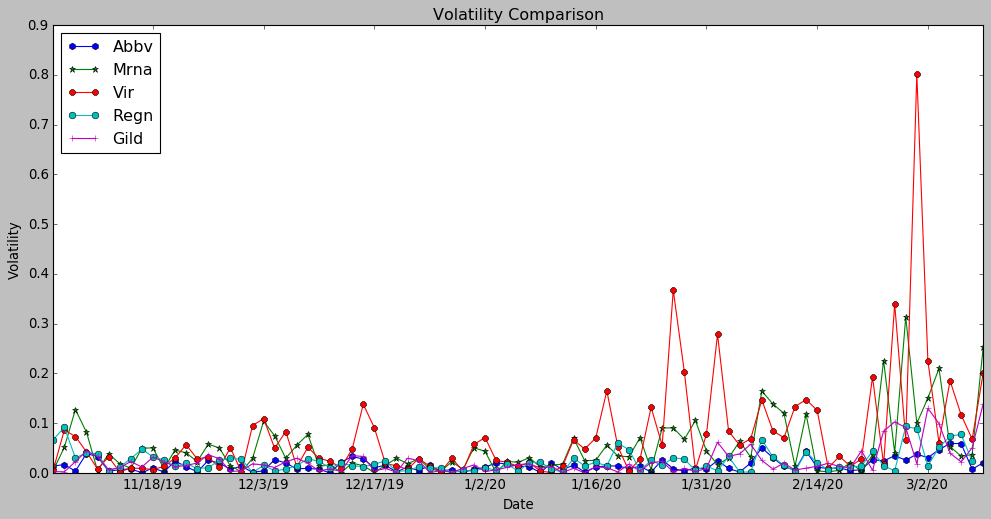

In [13]:
#file.plot(x="Date",y="Volume")
ax = plt.gca()

#plt.legend(loc='upper left', shadow=True, fontsize='x-large')
Abbv_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='h',label='Abbv',x_compat=True)
Mrna_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='*',label='Mrna',x_compat=True)
Vir_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='8',label='Vir',x_compat=True)
Regn_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='o',label='Regn',x_compat=True)
Gild_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='+',label='Gild',x_compat=True)

#datacursor(formatter=formatter, hover=True)
plt.title("Volatility Comparison")
plt.xlabel("Date")
plt.ylabel("Volatility");

In [14]:
#file.plot(x="Date",y="Volume")
ax = plt.gca()

#plt.legend(loc='upper left', shadow=True, fontsize='x-large')
Abbv_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='h',label='Abbv',x_compat=True)
Mrna_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='*',label='Mrna',x_compat=True)
Vir_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='8',label='Vir',x_compat=True)
Regn_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='o',label='Regn',x_compat=True)
Gild_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='+',label='Gild',x_compat=True)

#datacursor(formatter=formatter, hover=True)
plt.title("HL_PCT Comparison")
plt.xlabel("Date")w
plt.ylabel("HL_PCT");



SyntaxError: invalid syntax (<ipython-input-14-c9b9e0d82733>, line 13)

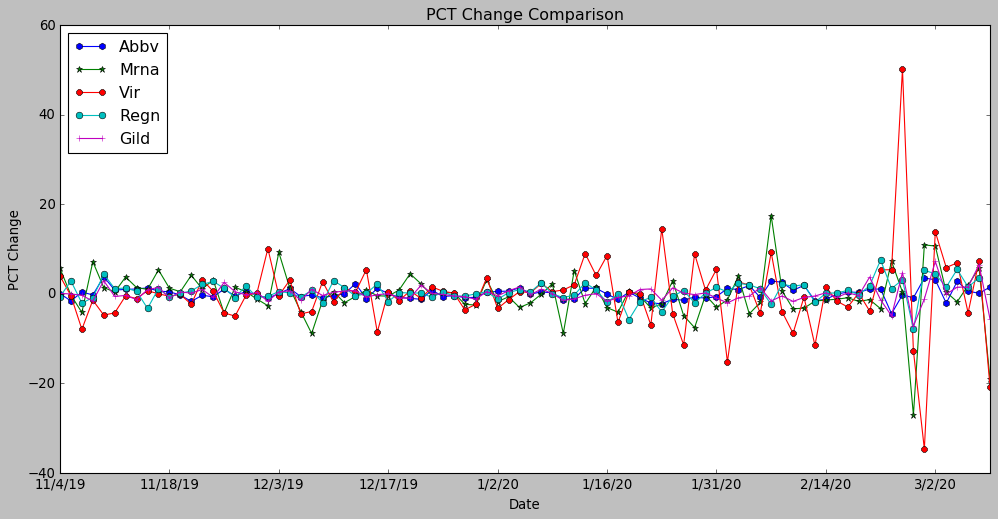

In [15]:
#file.plot(x="Date",y="Volume")

ax = plt.gca()

#plt.legend(loc='upper left', shadow=True, fontsize='x-large')

Abbv_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='h',label='Abbv',x_compat=True)
Mrna_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='*',label='Mrna',x_compat=True)
Vir_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='8',label='Vir',x_compat=True)
Regn_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='o',label='Regn',x_compat=True)
Gild_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='+',label='Gild',x_compat=True)

#datacursor(formatter=formatter, hover=True)

plt.title("PCT Change Comparison")
plt.xlabel("Date")
plt.ylabel("PCT Change");



In [16]:
#scatter matrix plot 
from pandas.plotting import scatter_matrix
healthcare_comp = pd.concat([Abbv_df['Open'],Mrna_df['Open'],
                          Vir_df['Open'],Regn_df['Open'],Gild_df['Open']],axis =1)

In [17]:
healthcare_comp.columns = ['Abbv Open', 'Mrna Open','Vir Open',
                       'Regn Open', 'Gild Open']

In [18]:
healthcare_comp.head()

,Abbv Open,Mrna Open,Vir Open,Regn Open,Gild Open
0,82.949997,15.900000,15.15,313.049988,65.160004
1,83.169998,16.940001,15.92,323.359985,65.410004
2,81.769997,16.830000,15.89,331.369995,65.629997
3,82.209999,16.330000,14.74,329.179993,65.019997
4,82.099998,17.250000,14.52,327.519989,63.529999


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a39dc80d0>,
      dtype=object)

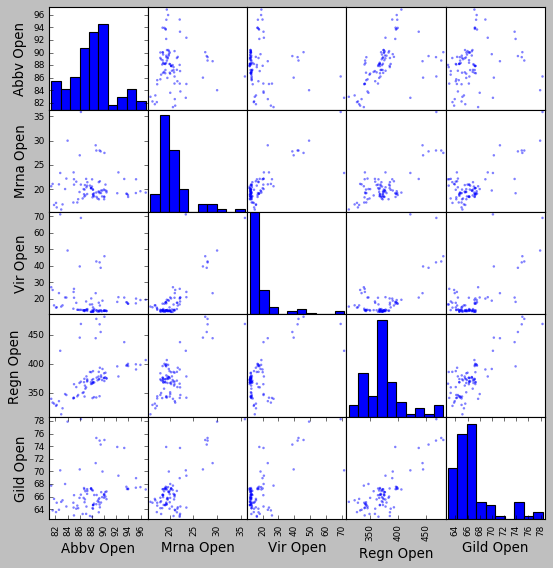

In [19]:
# to see relationship between these airlines company by opening price
scatter_matrix(healthcare_comp, figsize=(8,8))

In [20]:
#scatter matrix plot Close 
from pandas.plotting import scatter_matrix
healthcare_comp = pd.concat([Abbv_df['Close'],Mrna_df['Close'],Vir_df['Close'],
                          Regn_df['Close'],Gild_df['Close']],axis =1)


In [21]:
healthcare_comp.columns = ['Abbv Vol', 'Mrna Vol','Vir Vol',
                       'Regn Vol', 'Gild Vol']

In [22]:
healthcare_comp.head()

,Abbv Vol,Mrna Vol,Vir Vol,Regn Vol,Gild Vol
0,82.989998,16.799999,15.75,311.040009,65.209999
1,81.839996,16.889999,15.85,332.600006,65.389999
2,82.080002,16.129999,14.63,324.489990,65.410004
3,82.010002,17.500000,14.53,326.390015,63.959999
4,85.209999,17.490000,13.83,341.790009,65.379997


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a39dc87d0>,
      dtype=object)

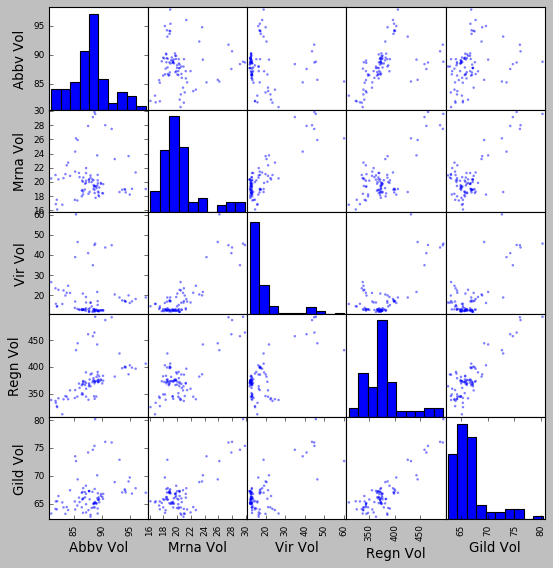

In [23]:
# to see relationship between these healthcare companies by volume price
scatter_matrix(healthcare_comp, figsize=(8,8))


Time Series Analysis with PANDAS Data Reader


In [24]:
#Time series
Abbv_df = pdr.get_data_yahoo('ABBV',
                        start=datetime.datetime(2019,11,29),
                        end=datetime.datetime(2020,4,3))
Mrna_df = pdr.get_data_yahoo('MRNA',
                        start=datetime.datetime(2019,11,29),
                        end=datetime.datetime(2020,4,3))
Vir_df = pdr.get_data_yahoo('VIR',
                        start=datetime.datetime(2019,11,29),
                        end=datetime.datetime(2020,4,3))
Regn_df = pdr.get_data_yahoo('REGN',
                        start=datetime.datetime(2019,11,29),
                        end=datetime.datetime(2020,4,3))
Gild_df = pdr.get_data_yahoo('GILD',
                        start=datetime.datetime(2019,11,29),
                        end=datetime.datetime(2020,4,3))

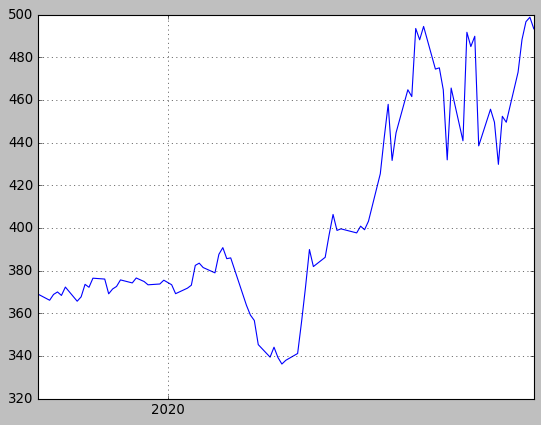

In [25]:
#REGN Time Series 
plt.plot(Regn_df.index, Regn_df['Adj Close'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.show()

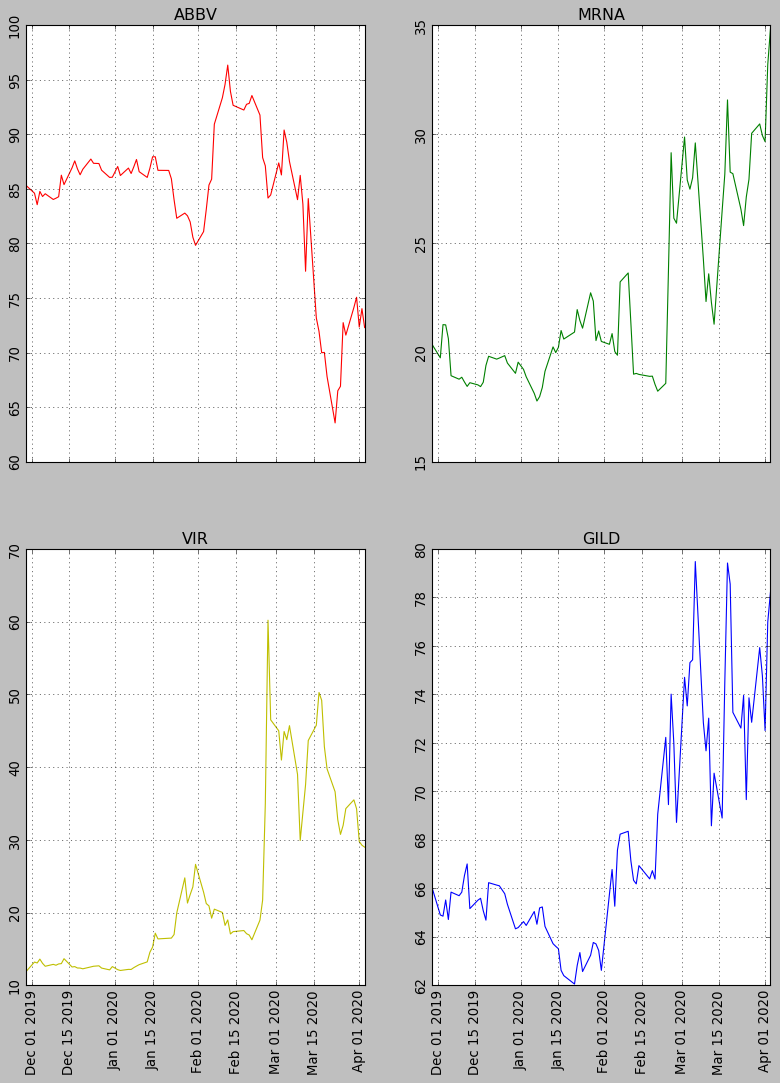

In [26]:
f, ax = plt.subplots(2, 2, figsize=(12,15), sharex=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
f.gca().xaxis.set_major_locator(mdates.YearLocator())

ax[0,0].plot(Abbv_df.index, Abbv_df['Adj Close'], color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('ABBV');

ax[0,1].plot(Mrna_df.index, Mrna_df['Adj Close'], color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('MRNA');

ax[1,0].plot(Vir_df.index, Vir_df['Adj Close'], color='y')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('VIR');

ax[1,1].plot(Gild_df.index, Gild_df['Adj Close'], color='b')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('GILD');

Daily Closing Percentage


In [27]:
Daily_close_Abbv_df = Abbv_df[['Adj Close']]

# Daily returns from stocks
Daily_pct_change_Abbv_df = Daily_close_Abbv_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Abbv_df.fillna(0, inplace=True)

Daily_pct_change_Abbv_df.head()



,Adj Close
Date,
2019-11-29,0.000000
2019-12-02,-0.007979
2019-12-03,-0.012409
2019-12-04,0.014543
2019-12-05,-0.005505


In [28]:
Daily_close_Mrna_df = Mrna_df[['Adj Close']]

# Daily returns from stocks
Daily_pct_change_Mrna_df = Daily_close_Mrna_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Mrna_df.fillna(0, inplace=True)

Daily_pct_change_Mrna_df.head()

,Adj Close
Date,
2019-11-29,0.000000
2019-12-02,-0.029470
2019-12-03,0.076923
2019-12-04,-0.000470
2019-12-05,-0.029619


In [29]:
Daily_close_Vir_df = Vir_df[['Adj Close']]

# Daily returns from stocks
Daily_pct_change_Vir_df = Daily_close_Vir_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Vir_df.fillna(0, inplace=True)

Daily_pct_change_Vir_df.head()

,Adj Close
Date,
2019-11-29,0.000000
2019-12-02,0.104603
2019-12-03,-0.009848
2019-12-04,0.040551
2019-12-05,-0.042647


In [30]:
Daily_close_Gild_df = Gild_df[['Adj Close']]

# Daily returns from stocks
Daily_pct_change_Gild_df = Daily_close_Gild_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Gild_df.fillna(0, inplace=True)

Daily_pct_change_Gild_df.head()

,Adj Close
Date,
2019-11-29,0.000000
2019-12-02,-0.016657
2019-12-03,-0.000756
2019-12-04,0.010292
2019-12-05,-0.012285


In [31]:
Daily_close_Regn_df = Regn_df[['Adj Close']]

# Daily returns from stocks
Daily_pct_change_Regn_df = Daily_close_Regn_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Regn_df.fillna(0, inplace=True)

Daily_pct_change_Regn_df.head()

,Adj Close
Date,
2019-11-29,0.000000
2019-12-02,-0.007913
2019-12-03,0.007457
2019-12-04,0.003145
2019-12-05,-0.004406


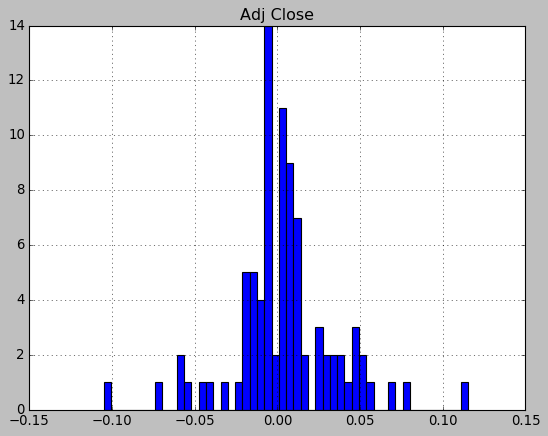

In [32]:
Daily_pct_change_Regn_df.hist(bins=50)

# Show the plot
plt.show()

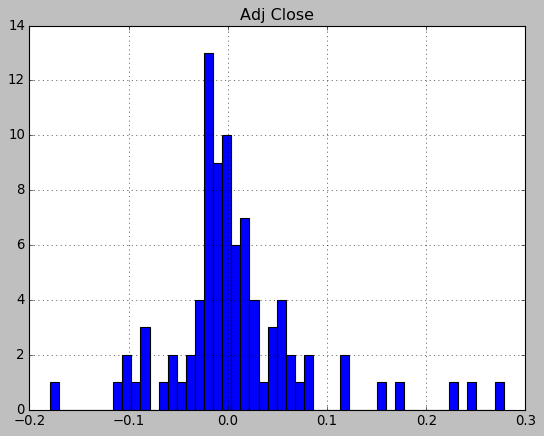

In [33]:
Daily_pct_change_Mrna_df.hist(bins=50)

# Show the plot
plt.show()

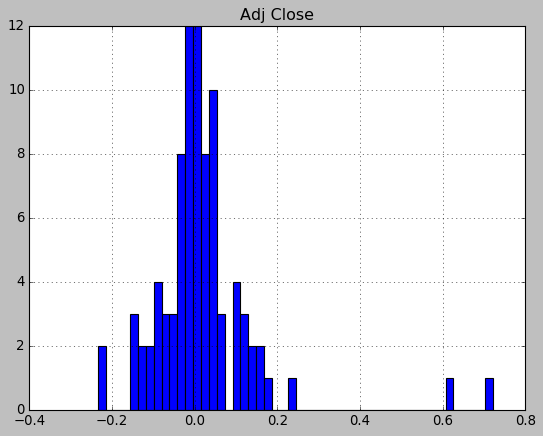

In [34]:
Daily_pct_change_Vir_df.hist(bins=50)

# Show the plot
plt.show()


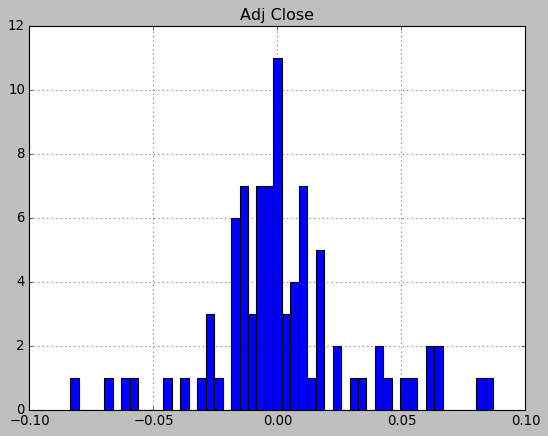

In [35]:
Daily_pct_change_Gild_df.hist(bins=50)

# Show the plot
plt.show()


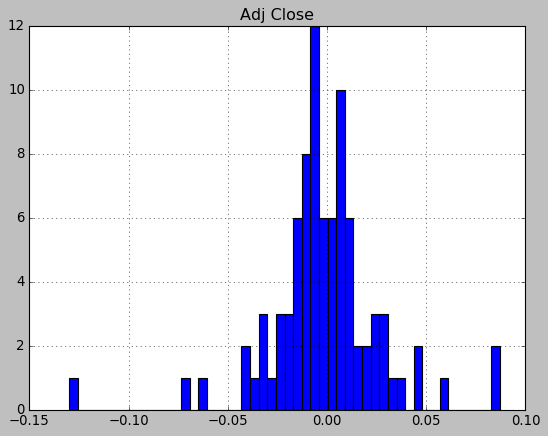

In [36]:
Daily_pct_change_Abbv_df.hist(bins=50)

# Show the plot
plt.show()


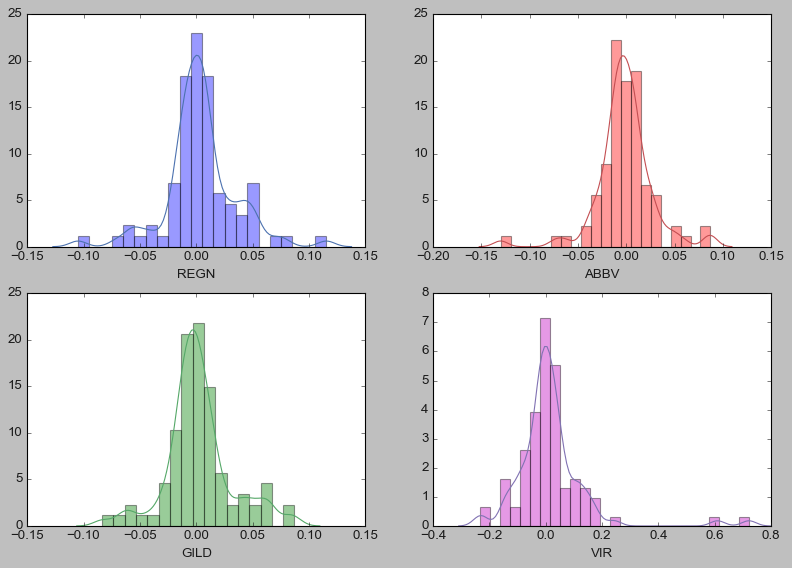

In [37]:
#  matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot a simple histogram with binsize determined automatically
sns.distplot(Daily_pct_change_Regn_df['Adj Close'], color="b", ax=axes[0, 0], axlabel='REGN');

sns.distplot(Daily_pct_change_Abbv_df['Adj Close'], color="r", ax=axes[0, 1], axlabel='ABBV');

sns.distplot(Daily_pct_change_Gild_df['Adj Close'], color="g", ax=axes[1, 0], axlabel='GILD');

# Ploting a historgram and kernel density estimate
sns.distplot(Daily_pct_change_Vir_df['Adj Close'], color="m", ax=axes[1, 1], axlabel='VIR');
sns.set();


Rolling Mean Analysis

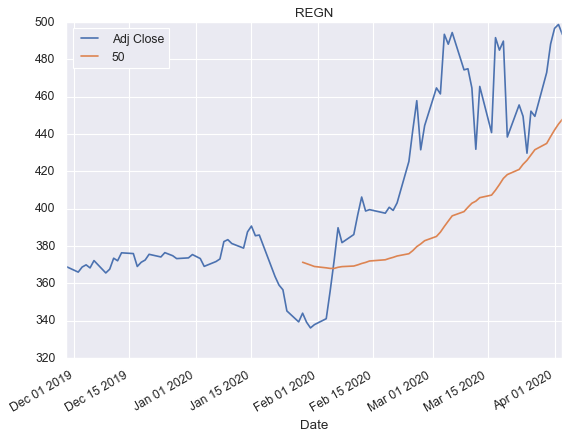

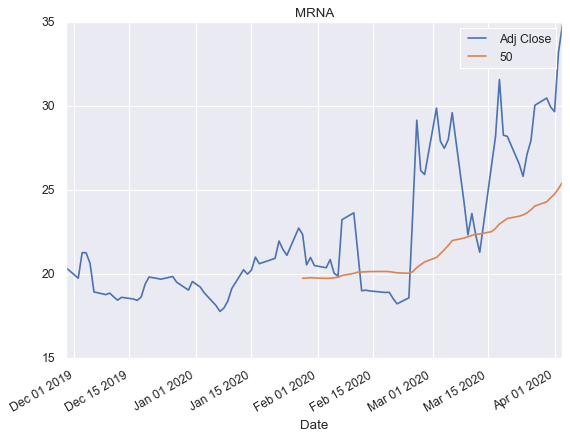

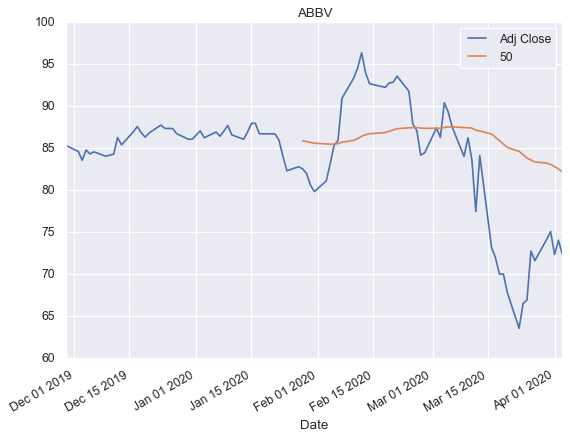

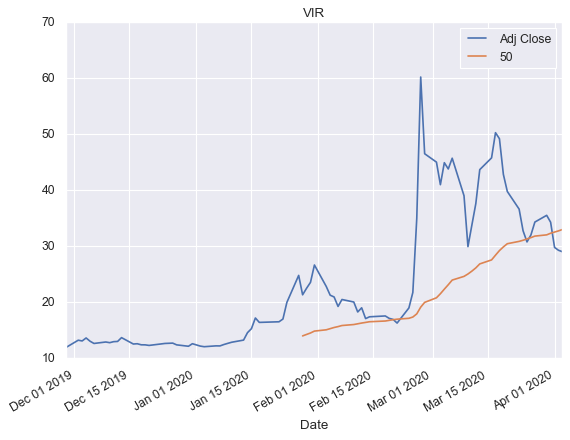

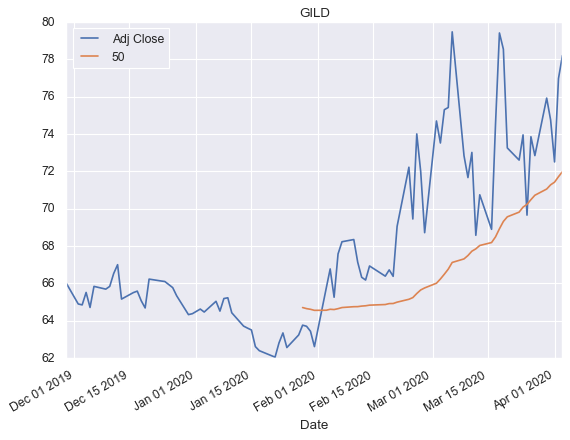

In [38]:
Regn_df_adj_close_px = Regn_df['Adj Close']
# Short moving window rolling mean
Regn_df['50'] = Regn_df_adj_close_px.rolling(window=40).mean()


# Plot the adjusted closing price, the short and long windows of rolling means
Regn_df[['Adj Close', '50']].plot(title="REGN")

# Show plot
plt.show()

Mrna_df_adj_close_px = Mrna_df['Adj Close']
# Short moving window rolling mean
Mrna_df['50'] = Mrna_df_adj_close_px.rolling(window=40).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
Mrna_df[['Adj Close', '50']].plot(title="MRNA")

# Show plot
plt.show()

Abbv_df_adj_close_px = Abbv_df['Adj Close']
# Short moving window rolling mean
Abbv_df['50'] = Abbv_df_adj_close_px.rolling(window=40).mean()


# Plot the adjusted closing price, the short and long windows of rolling means
Abbv_df[['Adj Close', '50']].plot(title="ABBV")

# Show plot
plt.show()

Vir_df_adj_close_px = Vir_df['Adj Close']
# Short moving window rolling mean
Vir_df['50'] = Vir_df_adj_close_px.rolling(window=40).mean()


# Plot the adjusted closing price, the short and long windows of rolling means
Vir_df[['Adj Close', '50']].plot(title="VIR")


Gild_df_adj_close_px = Gild_df['Adj Close']
# Short moving window rolling mean
Gild_df['50'] = Gild_df_adj_close_px.rolling(window=40).mean()


# Plot the adjusted closing price, the short and long windows of rolling means
Gild_df[['Adj Close', '50']].plot(title="GILD")

# Show plot
plt.show()